# Computer Assignment 3, Naive Bayes Classifier
### The purpose of this project is to use the Naive Bayes algorithm to determine whether the comments are positive or negative based on the text of the comments and their titles.

# Phase 1, Data pre processing 

## Data
Our data includes a list of comments with their titles and whether they are positive or negative. We have two sets of data here. The training data that we use to train our model and the test data that we will use to test the model.

In [3]:
import pandas as pd

TRAIN_FILE_ADDRESS = 'CA3_dataset/comment_train.csv'
row_train_data = pd.read_csv(TRAIN_FILE_ADDRESS)
row_train_data

,title,comment,recommend
0,زیبا اما کم دوام,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
1,بسیار عالی,بسیار عالی,recommended
2,سلام,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,به درد نمیخورهههه,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,کلمن آب,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended
...,...,...,...
5995,جنسش عالیه,خیلی جنس پارچش نرم ولطیفه خیلیم جنسش خوبه اما ...,recommended
5996,خرید محصول,سلام.واقعا فکر نمی کردم به این راحتی اصلاح کنم...,recommended
5997,تعریف,من از دیجی کالا خریدم خیلی زود دستم رسید،زیبا،...,recommended
5998,اصلا چای ماچا نیسش,یا شرکت نمیدونسته چای ماچا امپریال چیه یا واقع...,not_recommended


In [4]:
TEST_FILE_ADDRESS = 'CA3_dataset/comment_test.csv'
row_test_data = pd.read_csv(TEST_FILE_ADDRESS)
row_test_data

,title,comment,recommend
0,وری گود,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,پنکه گوشی,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,دستگاه خیلی ضعیف,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,عالی و بیست,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended
...,...,...,...
795,بسیار کوچیک,طراحیش قشنگه ولی داخل عکس خیلی بزرگتر ب چشم م...,not_recommended
796,لامپ چینی,این لامپ چینی هستتش کیفیت پایین . نور کم و فاق...,not_recommended
797,خوب بود,در کل از این خریدم راضی هستم و به تناسب قیمتش ...,recommended
798,کیفیت خوبی داره,تازع نصبش کردم-سرعت انتقال و نصب بازی روش عالی...,recommended


## Pre processing

The task of the processor class is to prepare the raw data. 

### Tokenize :
In this function, the text is divided into a number of words, which is done by the hazm library.


### Remove stop words :
Stopwords are words that do not have a meaningful effect despite the high repetition in the texts. This word list is already prepared and in this function we remove the words that are members of this list from the word list.

### Remove additionals :
Stemmer and Lemmatizer funcs are used here

In [5]:
from __future__ import unicode_literals
import hazm
import codecs

STOP_WORDS_FILE_ADDRESS = 'persian'

def read_stop_words(file_address):
    normalizer = hazm.Normalizer()
    return set([normalizer.normalize(w) for w in codecs.open(file_address).read().split('\n')])

stop_words = set(hazm.stopwords_list())
# read_stop_words(STOP_WORDS_FILE_ADDRESS)

class Processor:
    
    normalizer = hazm.Normalizer()
    lemmatizer = hazm.Lemmatizer()
    stemmer = hazm.Stemmer()
    
    @staticmethod
    def tokenize(text):
        tokens = []
        tokens = hazm.word_tokenize(text)
        return set(tokens)
    
    @staticmethod
    def normalize(text):
        return Processor.normalizer.normalize(text)

    @staticmethod
    def remove_stop_words(tokens):
        new_tokens = set()
        for token in tokens:
            if token not in stop_words:
                new_tokens.add(token)
        return new_tokens

    @staticmethod
    def remove_additionals(tokens):
        for token in tokens:
            token = Processor.stemmer.stem(token)
            token = Processor.lemmatizer.lemmatize(token)
        return tokens

For data preprocessing, we extract meaningful and processed words that make up the title column and comments and merge them together.
We also replace the recommendation column values with equivalent Boolean.

In [6]:
def pre_process_text(text):
    text = Processor.normalize(text)
    tokens = Processor.tokenize(text)
    tokens = Processor.remove_additionals(tokens)
#     tokens = Processor.remove_stop_words(tokens)
    return tokens

def pre_process_data(data, be_done):
    processed_data = pd.DataFrame()
    processed_data['features'] = data['comment'] + ' ' +  data['title']
    if be_done:
        processed_data['features'] = processed_data['features'].apply(lambda x: pre_process_text(x))
    else:
        processed_data['features'] = processed_data['features'].apply(lambda x: Processor.tokenize(x))
    processed_data['recommend'] = data['recommend'].replace({'not_recommended': False, 'recommended': True})
    return processed_data

## Question 1 
The Stemmng function is used to delete word additions. The Lemmitization function is also used to convert a word to its roots.
Deleting word additions generally seems like a good idea because it makes words with the same meaning one.
Converting words and verbs to their roots has the same process.
But the problem with the introduced library was that it also slowed down the work and, when converting the verb to a root, removed the negative prefix, which could destroy some of the meaningful information.

# Phase2, Problem process
<h2><center>$ P(y|f) = {{P(f|y)P(y)} \over P(f)}$</center></h2><br>
<h2><center>$ P(y|x) = P(f_1|y) \times P(f_2|y) \times ... \times P(f_n|y)\times P(y)$</center></h2><br>

## Question 2

<strong>Evidence = </strong> In this case, the words are in the text of the records.

<strong>posterior probability = $P(y|f)$</strong>

This expression refers to the probability that a data record is in class y, if it has the properties f.
Since in this case our classes are two classes <strong>recommended</strong> and <strong>not recommended</strong> and the properties are the words in the sentence (regardless of their position) ‌ The meaning of this phrase in this issue is the probability of a user's positive / negative opinion The condition is to have the text of his comment.

<strong> class prior probability = $P(y)$</strong>

This term refers to the probability that a data record is in class y.
Since in this case our classes are two classes <strong>recommended</strong> and <strong>not recommended</strong>, we mean the number of records that belong to class y in the most data among the total data.

<h3><center>$ P(y=recommended) = {numberOfTrainRecordsBelongTothisclass \over numberOfTrainRecords}$</center></h3><br>

<strong> likelihood = $P(f|y)$ = $P(f_1f_2f_3...f_n|y)$</strong><br>
Due to the simplification assumption of feature independence, we have that : 
<strong> $P(f_1f_2f_3...f_n|y)$ = $P(f_1|y) \times P(f_2|y) \times ... \times P(f_n|y)$</strong><br>

<h3><center>$ P(f_m=word1|y=recommended) = {numberOfTrainRecommendedRecordsThatHaveWord1InThisWords \over numberOfTrainRecommendedRecords}$</center></h3><br>
This phrase means what is the probability that the word1 is in recommended class?
To calculate it, we need to see how many records of this word are in the records that contained positive comments? And we also need to get the number of records that were positive from the test data.

## Algorithm implementation

In [16]:
import numpy as np

class Naive_bayes_algorithm:
    def __init__(self, classes, train_data, test_data):
        self.classes = classes
        self.train_data = train_data
        self.test_data = test_data
        self.features_stat = {}
        self.classes_count = dict()
        self.classes_possibility = dict()
    
    def analyze_train_data(self):
        for y in self.classes:
            self.train_data[self.train_data['recommend'] == y]['features'].apply(lambda x: self.get_features_stat(x, y))

    def get_features_stat(self, words, is_recommended):
        if is_recommended not in self.features_stat:
            self.features_stat[is_recommended] = {}
        for word in words:
            if word in self.features_stat[is_recommended]:
                self.features_stat[is_recommended][word] += 1
            else:
                self.features_stat[is_recommended][word] = 1
    
    def run(self, with_additive_smoothing):
        self.analyze_train_data()
        self.set_classes_count()
        
        for y in self.classes:
            self.classes_possibility[y] = []

        for features in self.test_data['features']:
            for y in self.classes:
                p_class_if_features = self.p_class_if_features(features, y, with_additive_smoothing)
                self.classes_possibility[y].append(p_class_if_features)
        
        final_prediction = []
        for i in range(len(self.test_data)):
            if self.classes_possibility[self.classes[0]][i] >= self.classes_possibility[self.classes[1]][i]:
                final_prediction.append(self.classes[0])
            else:
                final_prediction.append(self.classes[1])
        self.test_data['prediction'] = final_prediction
        self.test_data['correctness'] = np.where(self.test_data['recommend'] == self.test_data['prediction'], True, False)
        return self.calculate_accuracy(), self.calculate_precision(), self.calculate_recall(),self.calculate_f1()

    def calculate_accuracy(self):
        correct_detected = len(self.test_data[self.test_data['correctness'] == True])
        total = len(self.test_data)
        return correct_detected/total

    def calculate_precision(self):
        correct_detected_recommended = len(self.test_data[(self.test_data['correctness'] == True) & (self.test_data['prediction'] == True)])
        all_detected_recommended = len(self.test_data[self.test_data['prediction'] == True])
        return correct_detected_recommended/all_detected_recommended
    
    def calculate_recall(self):
        correct_detected_recommended = len(self.test_data[(self.test_data['correctness'] == True) & (self.test_data['prediction'] == True)])
        total_recommended = len(self.test_data[self.test_data['recommend'] == True])
        return correct_detected_recommended/total_recommended
    
    def calculate_f1(self):
        recall = self.calculate_recall()
        precision = self.calculate_precision()
        return (2 * precision * recall) / (precision + recall)

    def p_feature_if_class(self, f, y, with_additive_smoothing):
        if with_additive_smoothing: 
            if f in self.features_stat[y]:
                p_feature_if_class = (self.features_stat[y][f] + 1) / (self.classes_count[y] + len(self.features_stat[y]) + len(self.features_stat[not y]))
            else:
                p_feature_if_class = 1 / (self.classes_count[y] + len(self.features_stat[y]) + len(self.features_stat[not y])
        else:
            if f in self.features_stat[y]:
                p_feature_if_class = self.features_stat[y][f] / self.classes_count[y]
            else:
                p_feature_if_class = 0
        return p_feature_if_class
    
    def p_class_if_features(self, features, y, with_additive_smoothing):
        p_y = self.p_class(y)
        p_class_if_features = p_y
        for f in features:
            p_class_if_features *= self.p_feature_if_class(f,y,with_additive_smoothing)
        return p_class_if_features
    
    def p_class(self, y):
        return self.classes_count[y] / len(self.train_data)
        
    def set_classes_count(self):
        for y in self.classes:
            self.classes_count[y] = len(self.train_data[self.train_data['recommend'] == y])
    
    def get_incorrects(self):
        return self.test_data[self.test_data['correctness'] == False].tail(5)

SyntaxError: invalid syntax (<ipython-input-16-58455ee15f09>, line 73)

# Additive Smoothing

## Question 3 

<h3><center>$ P(f_m=word1|y=recommended) = {numberOfTrainRecommendedRecordsThatHaveWord1InThisWords \over numberOfTrainRecommendedRecords}$</center></h3><br>

Based on the above relation, the probability of the existence of a word if it is a positive comment is equal to the product of dividing the number of repetitions of that word in positive comments by the number of positive comments. So, for example, if a word does not appear in any of the comments of the train data records, the above statement becomes zero.
On the other hand, this phrase is multiplied by other expressions to make the total probability. And because it is zero, it makes the total probability zero.


## Question 4
<h2><center>$ P_{LAP,k}(x) = {{c(x) + k} \over N + k \times X}$</center></h2><br>

To solve this problem, we need to eliminate the probabilities that are equal to zero.
So we add k units to all the probabilities, and we also need to increase the denominator by the number of words multiplied by k.

# Phase 3,  Evaluation

## Question 5
Suppose we have test data with n records that is recommended and m records that is not recommended.
1. Our model recognizes all records as not recommended, except for one record for which the prediction was a correct. In this case, the value of Precision is equal to 100%, and this is in the case that our model did not perform well. So the value of Precision is not enough.

2. Our model has detected all records recommended. In this case, the value of Recall is equal to 100% because it has detected all the recommendeds correctly, but this is in the case that the performance of our model is not good and then the value of Recall is not enough and these two values must be together to make sense. 

## Question 6
Its name is harmonic average, the formula of which is given below.
Since the numerator form in both of these parameters is similar, we need to average the denominator of the fraction. After this average is used.
<h2><center>$H(x_1,x_2,...,x_n) = {n \over {1 \over x_1} + {1 \over x_2} + ... + {1 \over x_n}}$<h2><center>

### a

In [12]:
a_processed_train_data = pre_process_data(row_train_data, True)

In [13]:
a_processed_test_data = pre_process_data(row_test_data, True)

In [14]:
a = Naive_bayes_algorithm([True, False], a_processed_train_data, a_processed_test_data)
a_accuracy, a_precision, a_recall, a_f1 = a.run(True)
print('Accuracy of a = ', a_accuracy)
print('Precision of a = ', a_precision)
print('Recall of a = ', a_recall)
print('F1 of a = ', a_f1)

NameError: name 'Naive_bayes_algorithm' is not defined

### b

In [2]:
b_processed_train_data = pre_process_data(row_train_data, False)

NameError: name 'pre_process_data' is not defined

In [86]:
b_processed_test_data = pre_process_data(row_test_data, False)

In [106]:
b = Naive_bayes_algorithm([True, False], b_processed_train_data, b_processed_test_data)
b_accuracy, b_precision, b_recall, b_f1 = b.run(True)
print('Accuracy of b = ', b_accuracy)
print('Precision of b = ', b_precision)
print('Recall of b = ', b_recall)
print('F1 of b = ', b_f1)

Accuracy of b =  0.92
Precision of b =  0.8981042654028436
Recall of b =  0.9475
F1 of b =  0.9221411192214113


### c

In [88]:
c_processed_train_data = pre_process_data(row_train_data, True)

In [89]:
c_processed_test_data = pre_process_data(row_test_data, True)

In [107]:
c = Naive_bayes_algorithm([True, False], c_processed_train_data, c_processed_test_data)
c_accuracy, c_precision, c_recall, c_f1 = c.run(False)
print('Accuracy of c = ', c_accuracy)
print('Precision of c = ', c_precision)
print('Recall of c = ', c_recall)
print('F1 of c = ', c_f1)

Accuracy of c =  0.8725
Precision of c =  0.8028455284552846
Recall of c =  0.9875
F1 of c =  0.8856502242152466


### d

In [91]:
d_processed_train_data = pre_process_data(row_train_data, False)

In [92]:
d_processed_test_data = pre_process_data(row_test_data, False)

In [108]:
d = Naive_bayes_algorithm([True, False], d_processed_train_data, d_processed_test_data)
d_accuracy, d_precision, d_recall, d_f1 = d.run(False)
print('Accuracy of d = ', d_accuracy)
print('Precision of d = ', d_precision)
print('Recall of d = ', d_recall)
print('F1 of d = ', d_f1)

Accuracy of d =  0.86375
Precision of d =  0.7915831663326653
Recall of d =  0.9875
F1 of d =  0.8787541713014462


## Question 7

In [109]:
result = pd.DataFrame()
result['Model'] = ['a', 'b', 'c', 'd']
result['Accuracy'] = [a_accuracy, b_accuracy, c_accuracy, d_accuracy]
result['Precision'] = [a_precision, b_precision, c_precision, d_precision]
result['Recall'] = [a_recall, b_recall, c_recall, d_recall]
result['F1'] = [a_f1, b_f1, c_f1, d_f1]
result

,Model,Accuracy,Precision,Recall,F1
0,a,0.92375,0.910412,0.9400,0.924969
1,b,0.92000,0.898104,0.9475,0.922141
2,c,0.87250,0.802846,0.9875,0.885650
3,d,0.86375,0.791583,0.9875,0.878754


## Question 8

<function matplotlib.pyplot.show(close=None, block=None)>

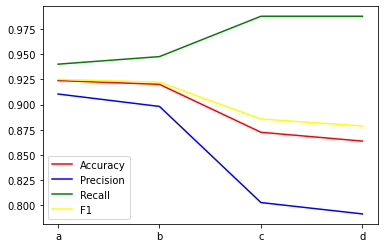

In [110]:
import matplotlib.pyplot as plt
plt.plot(result['Model'], result['Accuracy'], label= 'Accuracy', color='red')
plt.plot(result['Model'], result['Precision'], label= 'Precision', color='blue')
plt.plot(result['Model'], result['Recall'], label= 'Recall', color='green')
plt.plot(result['Model'], result['F1'], label= 'F1', color='yellow')
plt.legend()
plt.show

#### Accuracy
Shown above in red.
This value represents the percentage of correct answers among the total test data, which, as expected, is the highest for A, then B, then C, and finally D.

#### Precision
Shown above in blue.
This value is proportional to the number of comments correctly identified as recommended and inversely proportional to the number of comments detected as total recommended.

#### Recall
Shown above in green.
This value is proportional to the number of comments that were correctly identified as recommended, and inversely proportional to the number of comments that were in the total recommended test data.

Since the two values of Recall and Precision are examined together, we have that
T otal Recommended is the same for all modes. So when the Recall graph is descending, it means that the number of correct recommended diagnoses in the last case was the highest. So why is it less accurate? Because other models have recognized not recommended more correctly.
Now we see that the value of Precision was higher for the first case. In the case where the fraction is smaller than the rest. So its denominator is less sloping than the others, and number of it's recommended prediction is less.

#### F1
To conclude from the above two values, we use this parameter, as we can see, is descending.

## Question 9

In [98]:
incorrect_answer = a.get_incorrects()
incorrect_answer

,features,recommend,prediction,correctness
692,"{بخرید, معمولی, است, محصول, میکنم, کاملا, و, ب...",False,True,False
711,"{کم, ولی, قدرت, کمی, باد, داره, خوبه}",False,True,False
762,"{کرد, خریدن, زمینه, هستش, ای, نیاز, مشکی, اشتب...",True,False,False
771,"{آچارلوله, می‌شدم, کارمداوم, آچار, می‌گرفتم, م...",False,True,False
786,"{درد, گیاهیه, نوعش, نمیخوره, استفاده, من, حس, ...",False,True,False


The reason for this can be several things. One is that most of our data do not have a lot of useful information, and for example there are words that indicate the most positive opinion in the information, but in the test there are comments with a negative opinion.
So the problem can either be due to the number or type of most data, or it can be related to data preprocessing operations.